In [7]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [12]:
from dotenv import load_dotenv

In [13]:
import os
from groq import Groq

load_dotenv()  # Loads from .env

api_key = os.getenv("GROQ_API_KEY")
client = Groq(api_key=api_key)

Loading the API Key

In [11]:
import os
from dotenv import load_dotenv

# Load the .env file
load_dotenv()

# Now access your key
api_key = os.getenv("GROQ_API_KEY")

print("API Key loaded:", api_key[:4] + "..." if api_key else "Not Found")

API Key loaded: gsk_...


Loading the imagery dataset

In [2]:
import glob
import os

image_folder = "/Users/saransh/ATINUS/Main/Acne"

# Match common image formats
image_files = glob.glob(os.path.join(image_folder, "**", "*.*"), recursive=True)
image_files = [f for f in image_files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

print(f"Found {len(image_files)} images")
print("Example:", image_files[0])

Found 1832 images
Example: /Users/saransh/ATINUS/Main/Acne/63.jpg


Sample Image Checking

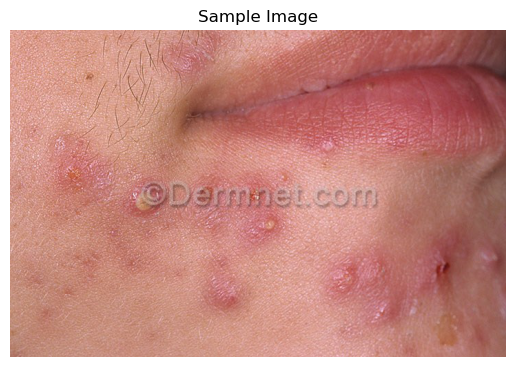

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_files[0])
plt.imshow(img)
plt.axis("off")
plt.title("Sample Image")
plt.show()


Encoding all the images

In [26]:
import base64
import os
import glob

image_folder = "/Users/saransh/ATINUS/Main/Acne"
image_files = glob.glob(os.path.join(image_folder, "*.*"))

encoded_images = {}

for path in image_files:
    with open(path, "rb") as f:
        encoded = base64.b64encode(f.read()).decode("utf-8")
        filename = os.path.basename(path)
        encoded_images[filename] = encoded

print(f"✅ Encoded {len(encoded_images)} images")
print("Sample:", list(encoded_images.items())[0])

✅ Encoded 1833 images
Sample: ('63.jpg', '/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAwMEBAQEBQkGBQUFBQsICAYJDQsNDQ0LDAwOEBQRDg8TDwwMEhgSExUWFxcXDhEZGxkWGhQWFxb/2wBDAQQEBAUFBQoGBgoWDwwPFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhb/wAARCAHbAtADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2WTZa/uka7hhTPl+d1VW4KxhhzzS+R5VrC8scTp5e+ObcCZA33TtH3QpFMkSSfT2WW6/eRN5gZf3u7Bw2MnGMd8VH+7Ksn2dXk8wyeRCpIUnHzMBxjPFfO3s9UfoFvv

In [27]:
from groq import Groq
client = Groq()
model = "llama-3.2-90b-vision-preview"
query = "what has happened to my skin?"

In [28]:
first_image_filename = list(encoded_images.keys())[0]
encoded_image = encoded_images[first_image_filename]

messages = [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": query},
                    {"type": "image_url", "image_url": {
                        "url": f"data:image/jpeg;base64,{encoded_image}"
                    }}
                ]
            }
        ]

In [31]:
response = client.chat.completions.create(
            model=model,
            messages=messages,
        )

In [32]:
print("🤖", response.choices[0].message.content)

🤖 It seems that you are likely experiencing breakouts of inflammatory acne, possibly caused by factors such as:

1. **Clogged pores**: Pore clogs are a cause of acne, the clogs create the perfect environment for bacteria to grow, leading to breakouts.
2. **Bacterial infection**: The presence of whiteheads and redness suggest a bacterial infection, which is common in acne breakouts.
3. **Hormonal fluctuations**: Hormonal changes can cause an increase in sebum production, leading to clogged pores and acne.
4. **Stress**: Stress can trigger hormonal imbalances, which can contribute to acne.
5. **Poor skin care routine**: Not removing makeup properly, using harsh products, or not washing your face regularly can clog pores and exacerbate acne.

To treat your acne, consider the following steps:

1. **Keep your skin clean**: Wash your face twice a day with a gentle cleanser to remove dirt and excess oil.
2. **Use non-comedogenic products**: Look for products labeled "non-comedogenic" or "oil-